# Heart Failure Data insights

## 1. Introduction :
#### The aim of this project is to find the factors influencing cause of Heart Failure. We are solving a Regression problem.

#### Preliminaries : Loading the packages required to setup environment for our analysis

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

# 2. Description of our Dataset
#### Loading our dataset to the dataframe. Then, we take look at the shape of our dataset and take a quick look at our dataset by printing first and last five rows.

In [9]:
# Loading our dataset in dataframe
df = pd.read_csv("/content/heart.csv")

In [10]:
# Shape of our dataset
df.shape

(303, 14)

In [11]:
# Datatypes of the columns
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol        float64
fbs           int64
restecg       int64
thalachh    float64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [12]:
# Printing first 5 rows of our dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1


In [13]:
# Printing last 5 rows of our dataset
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,130,131.0,0,1,115.0,1,1.2,1,1,3,0
302,57,0,1,130,236.0,0,0,174.0,0,0.0,1,1,2,0


Observation : We found out that there are few NaN values in our dataset

# 3. Preprocessing and Data Cleaning for EDA

In [14]:
# Finding our null values in columns
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        2
fbs         0
restecg     0
thalachh    2
exng        0
oldpeak     1
slp         0
caa         0
thall       0
output      0
dtype: int64

#### Observation : There are 2 each null values in chol and thalachh columns. There is one null value in oldpeak column

#### We will use Imputation technique which includes mean,median and mode to solve this issue. We will check which imputation can be used on this.

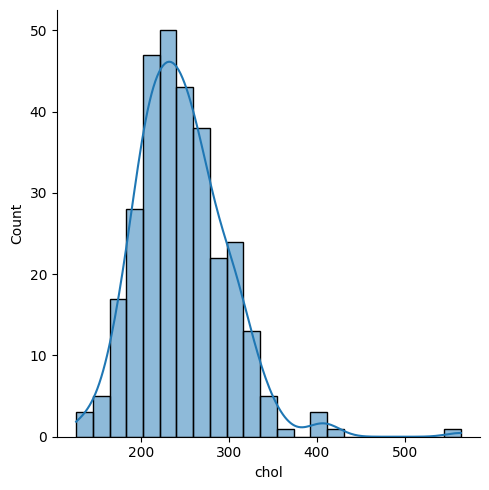

In [15]:
sns.displot(df["chol"], kde = True, edgecolor = "black")
plt.show()

#### Observation : Plot is left skewed, hence we will use median technique.

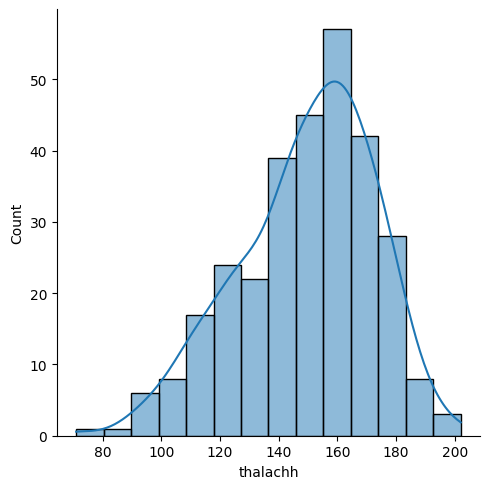

In [16]:
sns.displot(df["thalachh"], kde=True, edgecolor="black")
plt.show()

#### Observation : Plot is right skewed, hence we will use median technique.

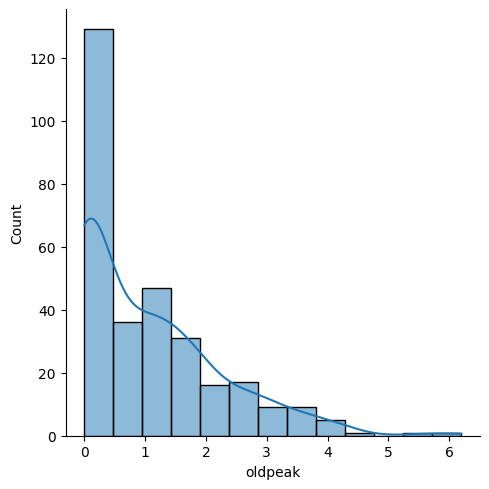

In [17]:
sns.displot(df["oldpeak"], kde = True, edgecolor="black")
plt.show()

#### Observation : Plot is left skewed, hence we will use median technique.

Now, we will use median technique on all the three columns.

In [18]:
df["chol"].fillna(df["chol"].median(), inplace = True)

In [19]:
df["thalachh"].fillna(df["thalachh"].median(), inplace = True)

In [20]:
df["oldpeak"].fillna(df["oldpeak"].median(), inplace = True)

In [21]:
# Now, we will check if the null values are filled with median values or not

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### Observation : We have replaced our null values with median values in three columns : Age, Smokes and Alkhol

In [22]:
# We will check if our dataset is balanced or not

df["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

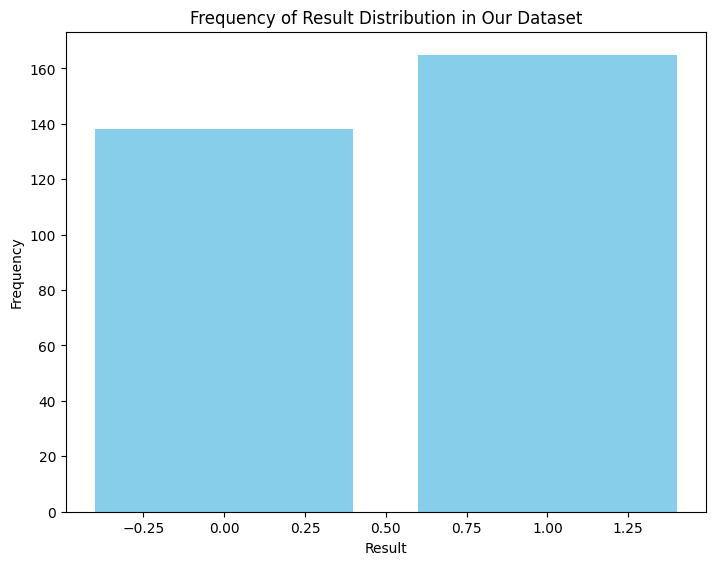

In [23]:
# We will check if our dataset is balanced or not in bar form
result_counts = df["output"].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(result_counts.index, result_counts.values, color='skyblue')
plt.title('Frequency of Result Distribution in Our Dataset')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.show()

#### Observation : We have ratio of 165-138, so its fairly balanced dataset, so no further action is needed to balance the dataset

# 4. Exploratory Data Analysis

#### 4-1. Statistics : Using describe function to get overview of statistics of our dataset

In [24]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.528053,0.148515,0.528053,149.521452,0.326733,1.041584,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.630998,0.356198,0.525860,22.839609,0.469794,1.160150,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,165.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Observation:
#### 1) Cholesterol levels show significant variability, with values ranging from 126 to 564 mg/dl and a high standard deviation of 51.63 mg/dl, indicating a wide range of cholesterol levels among the subjects.
#### 2) Mean age is 54.37 years, indicating a heart failures are mostly caused in middle-aged to elderly population.


#### 4-2. Plotting countplot to know distribution of age column.

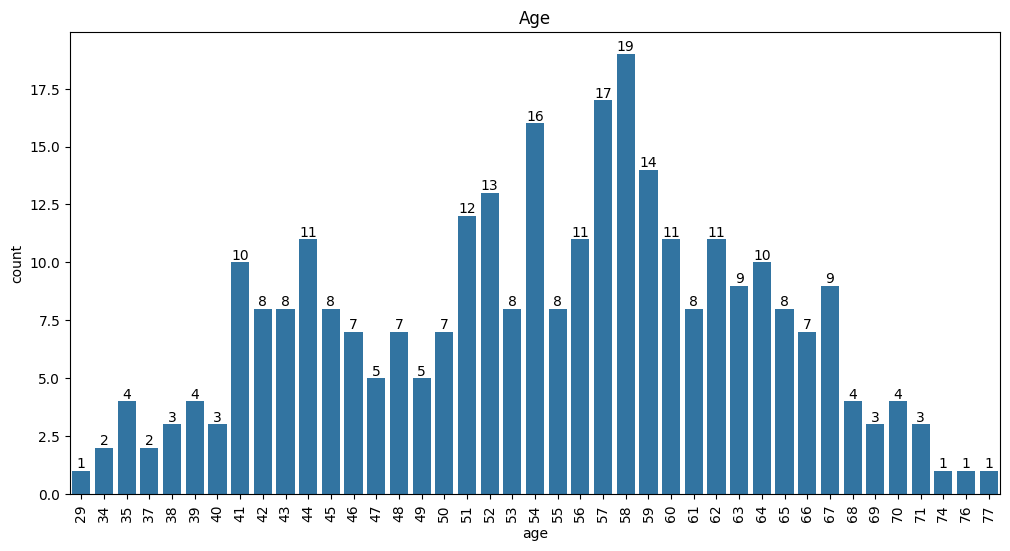

In [25]:
plt.figure(figsize=(12, 6), dpi=100)
countplot=sns.countplot(data=df,x="age")
for count in countplot.containers:
    countplot.bar_label(count,)

plt.xticks(rotation=90)
plt.title("Age")
plt.show()

Observation : Majority people leading to heart failure are in the age range of 51 to 67 years.








4-2. Plotting pir plot to know percent of subject at how risk of heart failure.

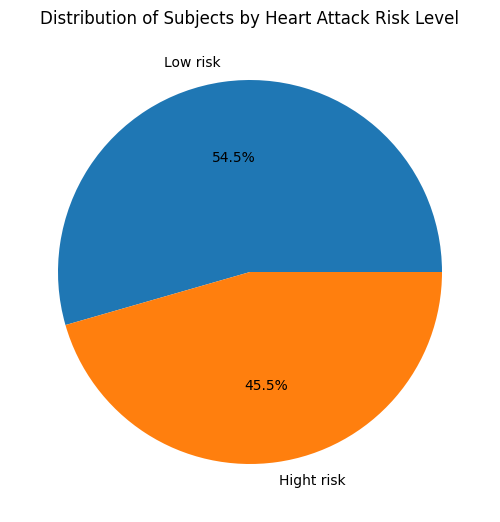

In [26]:
# Plotting bar plot
hight_risk_count = df['output'].sum()
non_hight_risk_count = len(df) - hight_risk_count

# Etichette per le fette
labels = ['Low risk', 'Hight risk']

# Dati per il grafico a torta
sizes = [hight_risk_count, non_hight_risk_count]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Subjects by Heart Attack Risk Level")
plt.show()


#### Observation :The number of subjects who are at high risk of heart attack are 54.5%.

#### 4.3 Plotting barplot to know heart attack risk by gender.

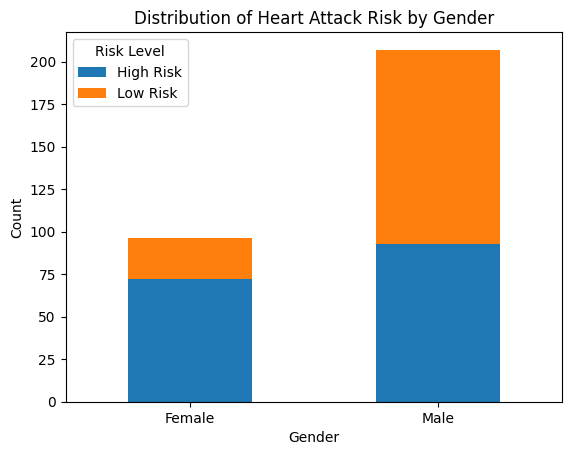

In [27]:
df['risk_level'] = df['output'].map({0: 'Low Risk', 1: 'High Risk'})

# Count occurrences of risk levels for each sex
risk_distribution = df.groupby(['sex', 'risk_level']).size().unstack()

risk_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Heart Attack Risk by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(title='Risk Level')
plt.show()



Observation : We came to know from the above plot that males are more prone to Heart attack as comapared to females

#### 4-4 Countplot to illustrate the distribution of chest pain

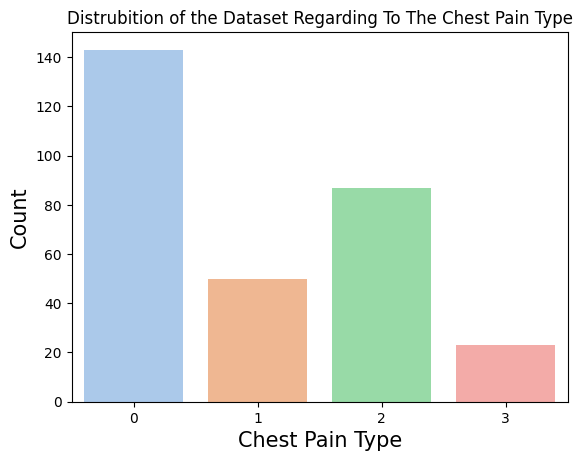

In [28]:
sns.countplot(data=df, x="cp", hue="cp", palette="pastel", legend=False)
plt.title("Distrubition of the Dataset Regarding To The Chest Pain Type" , fontsize = 12)
plt.xlabel("Chest Pain Type" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)
plt.show()

Observations : Majority of the people suffer from type 0 and type 2 kind of chest pain

#### 4-5. Plotting barplot to know smoking and drinking habits

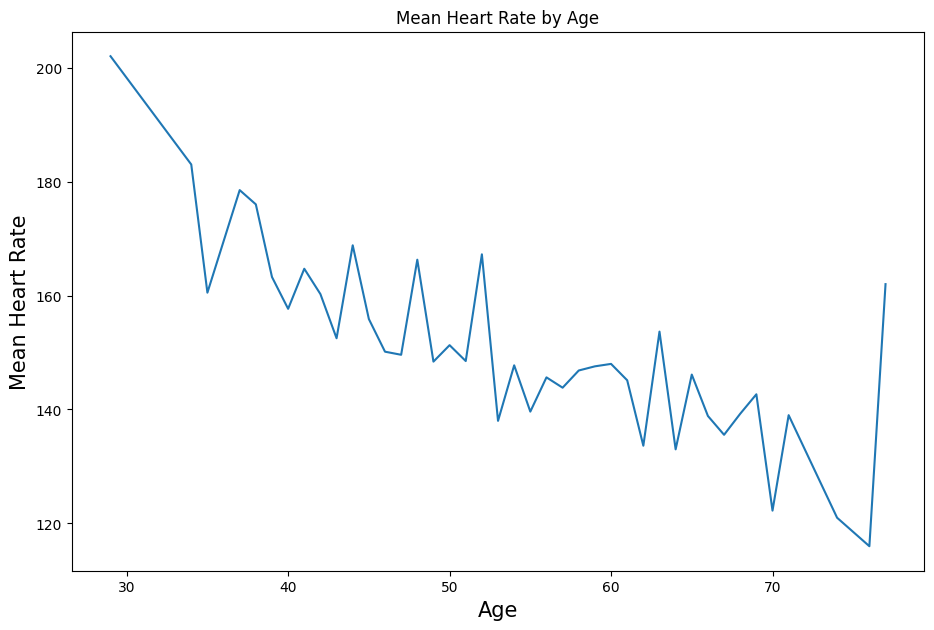

In [29]:
mean_rate_by_age = df.groupby('age')['thalachh'].mean()
plt.figure(figsize=(11,7))
plt.plot(mean_rate_by_age.index, mean_rate_by_age.values)
plt.title('Mean Heart Rate by Age', fontsize=12)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Mean Heart Rate', fontsize=15)
plt.show()

#### Observation: As people get older, the heart rate goes down as known

#### 4.6 Plotting plot to know distribution of Age among people who had Heart Attack

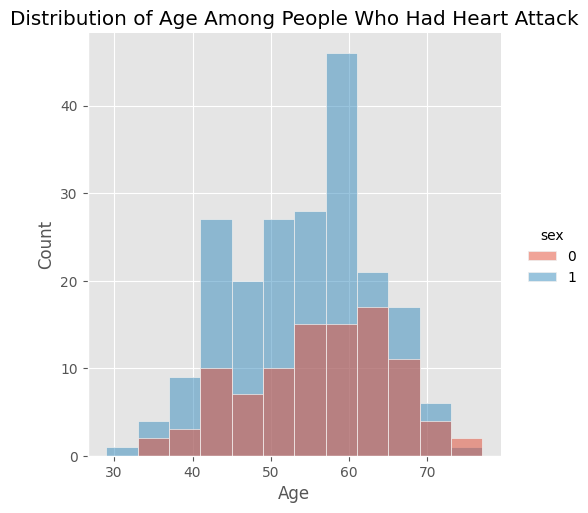

In [30]:
plt.style.use("ggplot")
sns.displot(data=df, x="age", hue='sex', height=5, aspect=1.0)
plt.title("Distribution of Age Among People Who Had Heart Attack")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



#### Observation : Upon visual inspection, it appears that females across all age groups tend to experience heart failure at a later stage compared to males.

#### 4.7 Plotting histogram of people who had heart attack

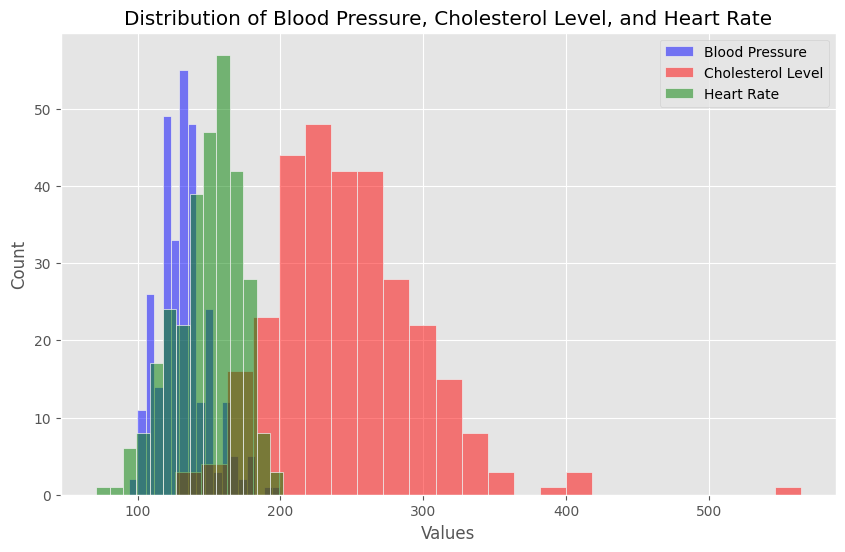

In [31]:
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")

# Plot the distribution of blood pressure
sns.histplot(df["trtbps"], color='blue', alpha=0.5, label='Blood Pressure')

# Plot the distribution of cholesterol level
sns.histplot(df["chol"], color='red', alpha=0.5, label='Cholesterol Level')

# Plot the distribution of heart rate
sns.histplot(df["thalachh"], color='green', alpha=0.5, label='Heart Rate')

plt.title("Distribution of Blood Pressure, Cholesterol Level, and Heart Rate")
plt.xlabel("Values")
plt.ylabel("Count")
plt.legend()
plt.show()
#"Values" represents the different measurements of blood pressure, cholesterol level, and heart rate.

#### Observations: We observe that individuals exhibiting blood pressure, cholesterol level, and heart rate typically fall within the range of 130 to 200.

#### 4.8 Plotting boxplot to visually analyze the distribution  

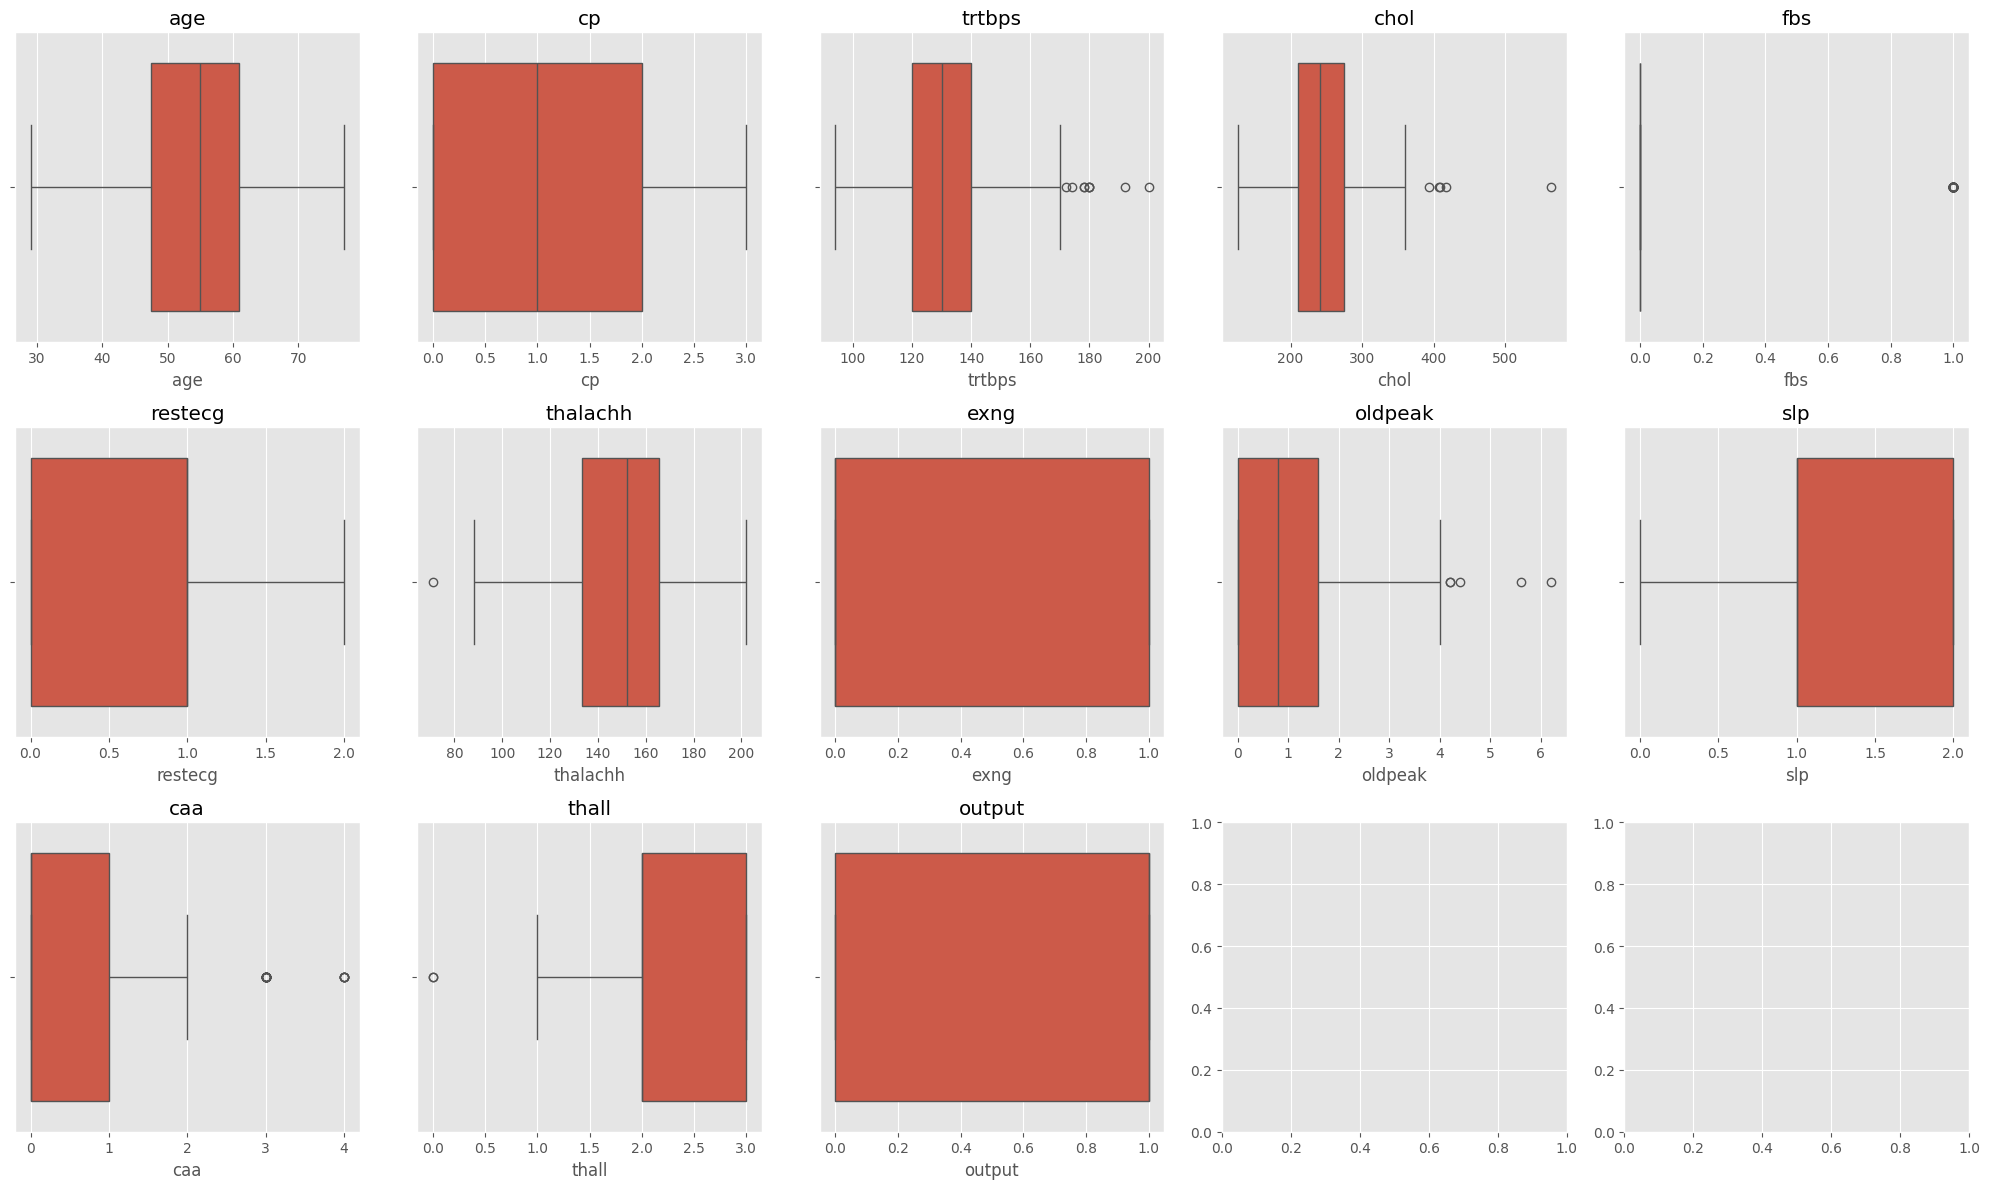

In [32]:
to_analyze = df[['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']]

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

for idx, column in enumerate(to_analyze.columns):
    ax = axs[idx // 5, idx % 5]
    sns.boxplot(data=to_analyze, x=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

#### Observation : We found out that there are outliers in following columns : trtbps, chol, fbs, thalach, oldpeak, caa and thall.

#### 4.9 Heatmap

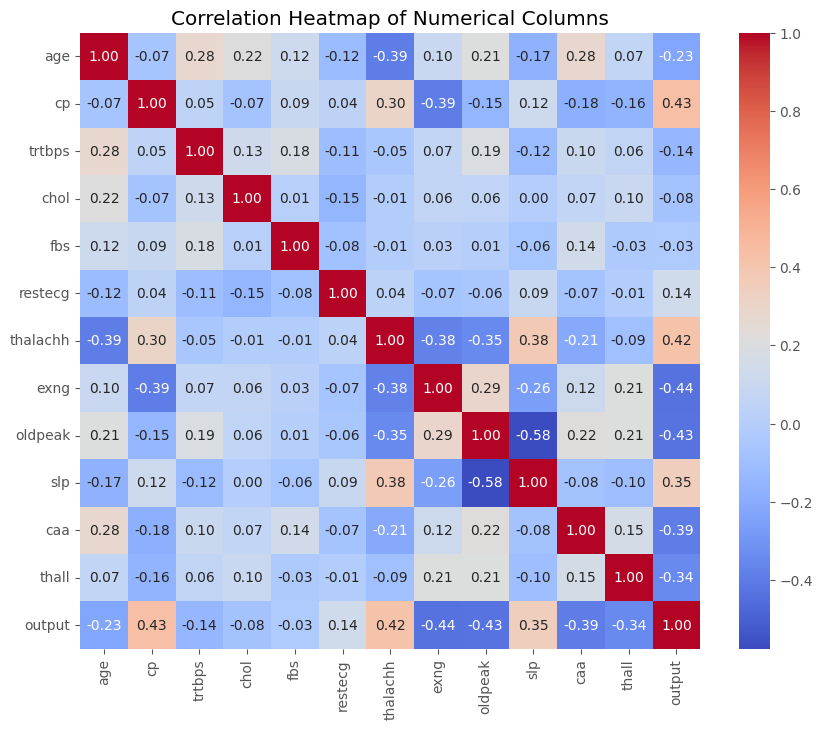

In [33]:
# Selecting numerical columns for the heatmap
numerical_columns = df[['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']]

# Calculating the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

Observation : Heatmap shows us correlation between our numeric columns

# 5. Polishing our data for model training

#### 5.1 Outlier detection and treating using Z-score

In [34]:
# Detect outliers using z-score
z_scores = np.abs((df[['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']] -
                   df[['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']].mean()) /
                  df[['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']].std())
outliers = df[(z_scores > 3).any(axis=1)]

# Treat outliers by removing them
df_cleaned = df[(z_scores <= 3).all(axis=1)]

In [35]:
# shape of our original dataframe
df.shape

(303, 15)

In [36]:
# Shape after treating outliers.
df_cleaned.shape

(287, 15)

#### Observation : Outliers were detected. Not many rows were dropped while treating outliers.

#### 5.2 One-Hot Encoding

#### We need to bring all the values of each column onto a common scale which will help us to train our model effiency. We are going to use Standarization technique for this. We have three categorical columns, hence performing one-hot encoding to convert categorical columns into numerical columns

In [37]:
# We have three categorical columns, hence performing one-hot encoding to convert categorical columns into numerical columns

encoded_df = pd.get_dummies(df_cleaned, columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'risk_level'])


In [38]:
# One-Hot Encoding result
encoded_df.head()

,output,age_29,age_34,age_35,age_37,age_38,age_39,age_40,age_41,age_42,...,slp_2,caa_0,caa_1,caa_2,caa_3,thall_1,thall_2,thall_3,risk_level_High Risk,risk_level_Low Risk
0,1,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1,1,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
2,1,False,False,False,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,True,False
3,1,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,True,False,True,False
4,1,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,True,False,True,False


#### 5.3 Standarization

In [39]:
# Splitting data
# Splitting data before doing standarization
X = encoded_df.drop("output", axis = 1)
y = encoded_df["output"]

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=2)

In [40]:
# Applying Standarization
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [41]:
# Displaying Standarized training data
x_train_std

array([[-0.06622662, -0.09386465, -0.13333333, ...,  1.28949242,
         0.92020334, -0.92020334],
       [-0.06622662, -0.09386465, -0.13333333, ..., -0.77549894,
        -1.08671633,  1.08671633],
       [-0.06622662, -0.09386465, -0.13333333, ..., -0.77549894,
         0.92020334, -0.92020334],
       ...,
       [-0.06622662, -0.09386465, -0.13333333, ..., -0.77549894,
         0.92020334, -0.92020334],
       [-0.06622662, -0.09386465, -0.13333333, ..., -0.77549894,
         0.92020334, -0.92020334],
       [-0.06622662, -0.09386465, -0.13333333, ...,  1.28949242,
        -1.08671633,  1.08671633]])

In [42]:
# Displaying Standarized test data
x_test_std

array([[-0.06622662, -0.09386465, -0.13333333, ...,  1.28949242,
         0.92020334, -0.92020334],
       [-0.06622662, -0.09386465, -0.13333333, ..., -0.77549894,
        -1.08671633,  1.08671633],
       [-0.06622662, -0.09386465, -0.13333333, ..., -0.77549894,
         0.92020334, -0.92020334],
       ...,
       [-0.06622662, -0.09386465, -0.13333333, ..., -0.77549894,
         0.92020334, -0.92020334],
       [-0.06622662, -0.09386465, -0.13333333, ..., -0.77549894,
         0.92020334, -0.92020334],
       [-0.06622662, -0.09386465, -0.13333333, ...,  1.28949242,
        -1.08671633,  1.08671633]])

# 6. Model Building

In [43]:
# Training Logistic Regression Model
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_std,y_train)
logistic_regression_predictions = logistic_regression.predict(x_test_std)



In [44]:
# Training Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_std, y_train)
dt_predictions = dt_model.predict(x_test_std)

In [45]:
# Training Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(x_train_std, y_train)
rf_predictions = rf_model.predict(x_test_std)

In [46]:
# Training Support Vector Machine model
svm_model = SVC()
svm_model.fit(x_train_std, y_train)
svm_predictions = svm_model.predict(x_test_std)

# 7. Model Evaluation

#### 7.1 Calculating accuracy of our models

In [47]:
# Calculating accuracy for Logistic Regression
lr_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print("Logisitc Regression Accuracy:", lr_accuracy*100)

# Calculating accuracy for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy*100)

# Calculating accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy*100)

# Calculating accuracy for Support Vector Machine
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine Accuracy:", svm_accuracy*100)

Logisitc Regression Accuracy: 94.82758620689656
Decision Tree Accuracy: 100.0
Random Forest Accuracy: 100.0
Support Vector Machine Accuracy: 93.10344827586206


#### Observation : We are getting high accuracy for all four of our machine learning models.

7.2 Calculating Precision, R2 score and F1 score

In [48]:
# Calculating precision, recall, and F1 score for Logistic Regression
lr_precision = precision_score(y_test, logistic_regression_predictions)
lr_recall = recall_score(y_test, logistic_regression_predictions)
lr_f1_score = f1_score(y_test, logistic_regression_predictions)

print("Decision Tree Precision:", lr_precision)
print("Decision Tree Recall:", lr_recall)
print("Decision Tree F1 Score:", lr_f1_score)


# Calculating precision, recall, and F1 score for Decision Tree
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions)

print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1_score)

# Calculating precision, recall, and F1 score for Random Forest
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)

print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1_score)

# Calculating precision, recall, and F1 score for Support Vector Machine
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1_score = f1_score(y_test, svm_predictions)

print("Support Vector Machine Precision:", svm_precision)
print("Support Vector Machine Recall:", svm_recall)
print("Support Vector Machine F1 Score:", svm_f1_score)


Decision Tree Precision: 0.9696969696969697
Decision Tree Recall: 0.9411764705882353
Decision Tree F1 Score: 0.955223880597015
Decision Tree Precision: 1.0
Decision Tree Recall: 1.0
Decision Tree F1 Score: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0
Support Vector Machine Precision: 0.9411764705882353
Support Vector Machine Recall: 0.9411764705882353
Support Vector Machine F1 Score: 0.9411764705882353


Observation : Precision, Recall and F1-score of all our four models is excellent

#### 7.3 Calculating confusion Matrix

In [49]:
# Calculate confusion matrix for Logisitc Regression
lr_conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)
print("Logisitc Regression Confusion Matrix:")
print(lr_conf_matrix)

# Calculate confusion matrix for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)

# Calculate confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print("\nRandom Forest Confusion Matrix:")
print(rf_conf_matrix)

# Calculate confusion matrix for Support Vector Machine
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print("\nSupport Vector Machine Confusion Matrix:")
print(svm_conf_matrix)


Logisitc Regression Confusion Matrix:
[[23  1]
 [ 2 32]]
Decision Tree Confusion Matrix:
[[24  0]
 [ 0 34]]

Random Forest Confusion Matrix:
[[24  0]
 [ 0 34]]

Support Vector Machine Confusion Matrix:
[[22  2]
 [ 2 32]]


Observation : Our confusion matrix is working well

In [50]:
# Combine actual and predicted values for Logistic Regression
lr_results = pd.DataFrame({'Actual': y_test, 'Predicted': logistic_regression_predictions})
print("Logisitc Regression Actual vs Predicted:")
print(tabulate(lr_results, headers='keys', tablefmt='psql'))

# Combine actual and predicted values for Decision Tree
dt_results = pd.DataFrame({'Actual': y_test, 'Predicted': dt_predictions})
print("Decision Tree Actual vs Predicted:")
print(tabulate(dt_results, headers='keys', tablefmt='psql'))

# Combine actual and predicted values for Random Forest
rf_results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})
print("\nRandom Forest Actual vs Predicted:")
print(tabulate(rf_results, headers='keys', tablefmt='psql'))

# Combine actual and predicted values for Support Vector Machine
svm_results = pd.DataFrame({'Actual': y_test, 'Predicted': svm_predictions})
print("\nSupport Vector Machine Actual vs Predicted:")
print(tabulate(svm_results, headers='keys', tablefmt='psql'))

Logisitc Regression Actual vs Predicted:
+-----+----------+-------------+
|     |   Actual |   Predicted |
|-----+----------+-------------|
|   7 |        1 |           1 |
| 170 |        0 |           0 |
| 130 |        1 |           1 |
| 131 |        1 |           1 |
| 217 |        0 |           0 |
|  30 |        1 |           1 |
| 151 |        1 |           1 |
| 211 |        0 |           0 |
|   3 |        1 |           1 |
|  98 |        1 |           1 |
|  13 |        1 |           1 |
| 168 |        0 |           0 |
| 188 |        0 |           0 |
|  42 |        1 |           1 |
| 186 |        0 |           0 |
| 200 |        0 |           0 |
| 235 |        0 |           0 |
| 113 |        1 |           1 |
| 264 |        0 |           0 |
| 216 |        0 |           1 |
| 274 |        0 |           0 |
| 119 |        1 |           0 |
| 178 |        0 |           0 |
| 231 |        0 |           0 |
|  68 |        1 |           1 |
| 103 |        1 |           1 |
| 

# 8. Conclusion

#### 1. Females across all age groups tend to experience heart failure at a later stage compared to males.

#### 2. As people get older, the heart rate goes down as known.

#### 3. Majority of the people suffer from type 0 and type 2 kind of chest pain